In [ ]:
# 07-3 rockburst

In [1]:
import warnings
warnings.filterwarnings("ignore")

# 加载数据

In [ ]:
import pandas as pd
df=pd.read_csv('data/rockbrust.csv',encoding='gbk')
df.head() # 前5行
df.tail() # 后5行
df.shape # 行列数
df.info()  # 数据整体信息
df.describe()   # 描述性统计
df.groupby('x4').size() # 数据的分类分布

In [2]:
import pandas as pd
df=pd.read_csv('data/rockbrust.csv',encoding='gbk')
df.head()

,x1,x2,x3,x4
0,0.34,24.0,6.6,Ⅲ
1,0.11,31.2,7.4,Ⅰ
2,0.10,23.0,5.7,Ⅰ
3,0.42,21.7,5.0,Ⅲ
4,0.77,17.5,5.5,Ⅳ


In [4]:
df.tail()

,x1,x2,x3,x4
99,0.57,31.2,3.2,Ⅱ
100,0.65,12.4,5.4,Ⅳ
101,0.59,18.8,4.2,Ⅲ
102,0.73,29.7,3.8,Ⅲ
103,0.37,42.3,2.8,Ⅰ


In [5]:
df.shape

(104, 4)

In [7]:
df.info()  # 数据整体信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      104 non-null    float64
 1   x2      104 non-null    float64
 2   x3      104 non-null    float64
 3   x4      104 non-null    object 
dtypes: float64(3), object(1)
memory usage: 3.4+ KB


In [6]:
df.describe()   # 描述性统计

,x1,x2,x3
count,104.000000,104.000000,104.000000
mean,0.489038,22.625962,4.070192
std,0.216488,10.507353,1.897053
min,0.100000,6.700000,0.900000
25%,0.365000,14.775000,2.300000
50%,0.475000,20.700000,3.700000
75%,0.625000,28.900000,5.200000
max,1.410000,55.000000,10.900000


In [8]:
# 数据的分类分布
df.groupby('x4').size()

x4
Ⅰ    20
Ⅱ    28
Ⅲ    37
Ⅳ    19
dtype: int64

#  数据预处理

In [3]:
from sklearn.model_selection import train_test_split
# 数据拆分
array = df.values
X = array[:, 0:-1].astype(float)
Y = array[:, -1]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
# 数据标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

In [5]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
# 对非数字列进行编码 
# X = OrdinalEncoder().fit_transform(X)
Y0 = LabelEncoder().fit_transform(Y)
set(Y),set(Y0)

({'Ⅰ', 'Ⅱ', 'Ⅲ', 'Ⅳ'}, {0, 1, 2, 3})

# 特征分析

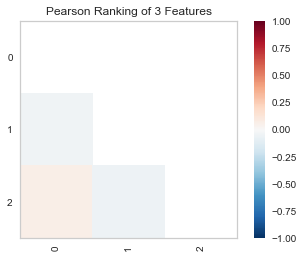

In [14]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm='pearson')  # 皮尔森相关系数
visualizer.fit(X, Y)           
visualizer.transform(X)        
visualizer.poof()       

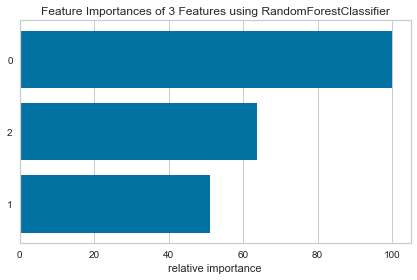

In [15]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features.importances import FeatureImportances
model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, Y)
viz.poof()

# 单一模型评估

## 采用原始数据训练

LR得分： 0.42857142857142855
LDA得分： 0.9047619047619048
KNN得分： 0.47619047619047616
CART得分： 0.8095238095238095
NB得分： 0.8095238095238095
SVM得分： 0.5714285714285714


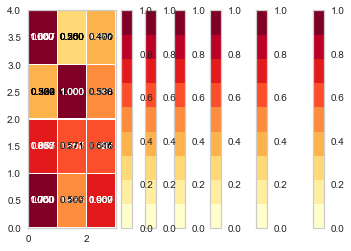

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from yellowbrick.classifier import ClassificationReport
# 模型评估
def test(model,name):
    visualizer = ClassificationReport(model)
    visualizer.fit(X_train, Y_train)
    print(name+'得分：',visualizer.score(X_validation, Y_validation)) 
#     visualizer.poof()
# 评估算法（原始数据）
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()  # 最佳
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
for key in models:
    model = models[key]
    test(model,key)    

0.9047619047619048


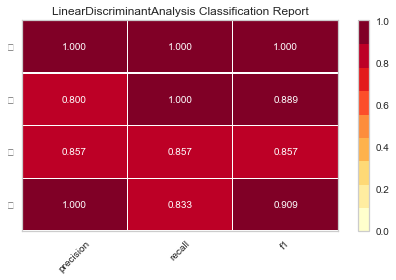

In [18]:
model = LinearDiscriminantAnalysis()
visualizer = ClassificationReport(model)
visualizer.fit(X_train, Y_train)
print(visualizer.score(X_validation, Y_validation))
visualizer.poof()

## 数据标准化后训练

LR得分： 0.6190476190476191
LDA得分： 0.9047619047619048
KNN得分： 0.7619047619047619
CART得分： 0.8095238095238095
NB得分： 0.8095238095238095
SVM得分： 0.8095238095238095


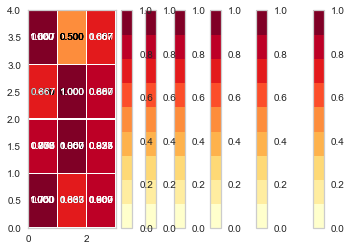

In [19]:
# 标准化数据
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
# 评估算法（标准化处理）
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()  # 最佳
models['NB'] = GaussianNB()
models['SVM'] = SVC()
for key in models:
    model = models[key]
    test(model,key)   

# 集成学习

ScaledAB得分： 0.2857142857142857
ScaledGBM得分： 0.7619047619047619
ScaledRF得分： 0.7619047619047619


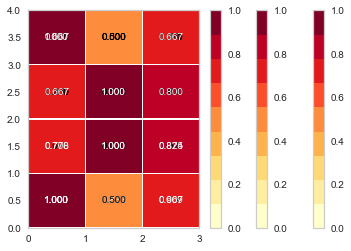

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
# 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestClassifier())])  # 最佳
for key in ensembles:
    model = ensembles[key]
    test(model,key) 

# 参数优化

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
num_folds = 10
seed = 7
scoring = 'accuracy'
param_grid = {'solver':['svd', 'lsqr', 'eigen']}
model = LinearDiscriminantAnalysis()
# K折交叉验证
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优：0.9156626506024096 使用{'solver': 'svd'}


E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
num_folds = 10
seed = 7
scoring = 'accuracy'
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
# 梯度提升树
model = RandomForestClassifier()
# K折交叉验证
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


最优：0.8313253012048193 使用{'n_estimators': 200}


# 最终模型

LDA得分： 0.9047619047619048


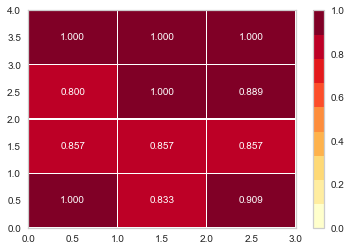

In [26]:
model = LinearDiscriminantAnalysis(solver='svd')
model.fit(X=X_train, y=Y_train)
test(model,'LDA') 

# 模型持久化

## 模型保存

In [27]:
from sklearn.externals import joblib
model_file = 'data/rockburst.m'
model = LinearDiscriminantAnalysis(solver='svd')
model.fit(X=X_train, y=Y_train)
joblib.dump(model, model_file) 

E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-pac

E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-pac

['data/rockburst.m']

## 模型加载

In [28]:
model2 = joblib.load(model_file) 
result = model2.score(X_validation, Y_validation)
print("算法评估结果：%.3f%%" % (result * 100))

算法评估结果：80.952%


In [29]:
# 预测测试数据前10
model2.predict(X_validation[0:10])

array(['Ⅲ', 'Ⅰ', 'Ⅱ', 'Ⅱ', 'Ⅲ', 'Ⅰ', 'Ⅲ', 'Ⅰ', 'Ⅲ', 'Ⅲ'], dtype=object)

In [30]:
# 对比测试数据真实分类
Y_validation[0:10]

array(['Ⅳ', 'Ⅰ', 'Ⅰ', 'Ⅱ', 'Ⅲ', 'Ⅰ', 'Ⅲ', 'Ⅰ', 'Ⅳ', 'Ⅲ'], dtype=object)